# Classification of NBA players role

## IMPORTANT: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook, since this is the way we will do it before evaluting your notebook! Only the notebook file will be submitted, do not change the data filenames, file content or paths we'll use the provided ones.

Student name: **Delfina Iriarte**

ID Number: **1231682**

### Dataset description

We will be working with a dataset of NBA basketball players data (you can get from https://www.kaggle.com/jacobbaruch/nba-player-of-the-week the full dataset).

The provided data is a subset of the full dataset containing the players that have the role of Center and of Point Guard. For each player the dataset contains the height, weight and age.

From Wikipedia:

The **Center** (C), also known as the five, or the big man, is one of the five positions in a regular basketball game. The center is normally the tallest player on the team, and often has a great deal of strength and body mass as well. In the NBA, the center is usually 6' 10" (2.08 m) or taller and usually weighs 240 lbs (109 kg) or more. 

**Point Guards** (PG, a.k.a. as "play maker") are expected to run the team's offense by controlling the ball and making sure that it gets to the right players at the right time. In the NBA, point guards are usually about 6' 3" (1.93 m) or shorter, and average about 6' 2" (1.88 m). Having above-average size (height, muscle) is considered advantageous, although size is secondary to situational awareness, speed, quickness, and ball handling skills. Shorter players tend to be better dribblers since they are closer to the floor, and thus have better control of the ball while dribbling. 


As it is clear from the description, the height and weight of the player are good hints to predict their role and in this lab we will exploit this features to estimate the role.


### Three features (regressors) are considered for this dataset:


1) Height in cm

2) Weight in kg

3) Age in years

We first import all the packages that are needed.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import numpy as np

import scipy as sp
from scipy import stats

import sklearn as sl
from sklearn import datasets
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Perceptron
We will implement the perceptron algorithm and use it to learn a halfspace.

**TO DO** Set the random seed (you can use your ID (matricola) or any other number!).

In [2]:
IDnumber = 1231682  #, try also to change the seed to see the impact of random initialization on the results
np.random.seed(IDnumber)

Load the dataset and then split in training set and test set (the training set is typically larger, you can use a 75% tranining 25% test split) after applying a random permutation to the datset.

A) Load dataset and perform permutation

In [3]:
#load the dataset
filename = 'data/NBA.csv' # do not change the file name or content
NBA = csv.reader(open(filename, newline=''), delimiter=',')

header = next(NBA) #skip first line
print(header)

dataset = list(NBA)
for i in range(len(dataset)):
    dataset[i] = [int(x) for x in dataset[i]]
    
dataset = np.asarray(dataset)

X = dataset[:,1:4] #columns 1,2,3 contain the features
Y = dataset[:,0]  # column 0: labels

Y = Y*2-1  # set labels to -1, 1 as required by perceptron implementation

m = dataset.shape[0]
permutation = np.random.permutation(m) #Randomly permute a sequence, or return a permuted range.

X = X[permutation]
Y = Y[permutation]

print(X.shape, X.shape[0], X.shape[1])

['Position', 'Height cm', 'kg', 'Age']
(260, 3) 260 3


We are going to classify class "1" (Center) vs class "-1" (Point Guard)

B) **TO DO** Divide the data into training set and test set (3/4 of the data in the first set, 1/4 in the second one)

In [4]:
#m_training needs to be the number of samples in the training set
m_training = int(X.shape[0]/4)*3

#m_test needs to be the number of samples in the test set
m_test = int(X.shape[0])- m_training

#X_training = instances for training set
X_training = X[:m_training,:]
#Y_training = labels for the training set
Y_training = Y[:m_training]


#X_test = instances for test set
X_test = X[:m_test,:]
#Y_test = labels for the test set
Y_test = Y[:m_test]

print(Y_training) #to make sure that Y_training contains both 1 and -1

print("Shape of training set: " + str(X_training.shape))
print("Shape of test set: " + str(X_test.shape))

[-1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1  1  1  1  1  1  1 -1 -1 -1  1  1 -1
  1 -1  1  1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1  1 -1  1 -1 -1  1
  1  1 -1 -1 -1  1  1  1 -1 -1  1  1 -1  1 -1 -1 -1 -1  1 -1  1 -1 -1  1
  1  1  1 -1  1 -1  1 -1 -1  1  1 -1  1  1 -1  1  1 -1  1 -1 -1 -1  1  1
  1 -1  1 -1 -1 -1  1  1 -1  1 -1 -1  1 -1 -1  1 -1  1  1  1  1 -1 -1  1
  1 -1  1  1  1  1 -1  1  1  1 -1  1  1  1  1  1 -1  1  1 -1  1  1  1  1
 -1 -1 -1  1 -1 -1  1  1  1 -1 -1  1  1  1  1  1 -1 -1  1  1 -1  1  1 -1
 -1  1 -1 -1 -1  1  1  1  1  1 -1 -1  1  1 -1 -1  1 -1  1  1 -1  1 -1 -1
  1  1  1]
Shape of training set: (195, 3)
Shape of test set: (65, 3)


**TO DO** Now add a 1 in front of each sample so that we can use a vector in homogeneous coordinates to describe all the coefficients of the model. You can use the function $hstack$ in $numpy$

In [5]:
#add a 1 to each sample (homogeneous coordinates)

#I create a colum fill with ones
#np.ones = Return a new array of given shape and type, filled with ones.

frst_col_train = np.ones((m_training,1))
frst_col_test = np.ones((m_test,1))

# np.hstack is used to 'stack' the first column and the matrix
X_training = np.hstack((frst_col_train ,X_training))
X_test = np.hstack((frst_col_test,X_test))




**TO DO** Now complete the function *perceptron*. Since the perceptron does not terminate if the data is not linearly separable, your implementation should return the desired output (see below) if it reached the termination condition seen in class or if a maximum number of iterations have already been run, where one iteration corresponds to one update of the perceptron weights. In case the termination is reached because the maximum number of iterations have been completed, the implementation should return **the best model** seen up to now.

The input parameters to pass are:
- $X$: the matrix of input features, one row for each sample
- $Y$: the vector of labels for the input features matrix X
- $max\_num\_iterations$: the maximum number of iterations for running the perceptron

The output values are:
- $best\_w$: the vector with the coefficients of the best model
- $best\_error$: the *fraction* of missclassified samples for the best model

Now we use the implementation above of the perceptron to learn a model from the training data using 100 iterations and print the error of the best model we have found.

In [6]:
def perceptron(X, Y, max_num_iterations):
    
    #its common to initialize with zero the guess
    w_i = np.zeros(X.shape[1])
    samples = X.shape[0]
    best_error = samples+1
    
    #we begin by assuming that out best w is our first guess
    best_w = w_i

    missclassified = -1 #we consider this point that is missclasief by the w to calculate the error adn to perform our perceptron
    #we do this because this help us to improve our error. 
    #Before when I didnt added this missclassified variable I get an overfit
    #(Training Error of perpceptron of 100 iterations =0.005128205128205128
    #Test Error of perpceptron of 100 iterations = 0.5538461538461539**
    
    
    num_missclassified = 0
    #in this 'bad point' we can perform our perceptron
    #we are going to interet withing our training data
    for i in range(samples):
        permutation = np.random.permutation(samples)
        x = X[permutation[i],:]
        y = Y[permutation[i]]

        if (np.dot(w_i,x) * y) <= 0:
            missclassified = permutation[i]
            num_missclassified += 1
    if num_missclassified < best_error:
        #empirical_error
        best_error = num_missclassified
        best_w = w_i

    it = 1
    while ((missclassified != -1) and (it < max_num_iterations)):
        w_i = w_i + Y[missclassified]* X[missclassified,:]
        missclassified = -1
        num_missclassified = 0 #this help us to keep track of the number of error we have
        for i in range(samples):
            
            #Permutating the variables so that it can check the elements randomly help to improve the errors (so we are going to apply it - make sense actually)
            permutation = np.random.permutation(samples)
            x = X[permutation[i],:]
            y = Y[permutation[i]]
 
            if (np.dot(w_i,x) * y) <= 0:
                missclassified = permutation[i]
                num_missclassified += 1
        if num_missclassified < best_error:
            #empirical_error
            best_error = num_missclassified
            best_w = w_i
        it += 1
        
    best_error =float(best_error)/float(samples)
    return best_w, best_error

In [7]:
#now run the perceptron for 100 iterations
w_found, error = perceptron(X_training,Y_training, 100)
print("Training Error of perpceptron (100 iterations): " + str(error))
print('Best w is:', w_found)

Training Error of perpceptron (100 iterations): 0.06153846153846154
Best w is: [ -2. -90. 192. -36.]


**TO DO** use the best model $w\_found$ to predict the labels for the test dataset and print the fraction of missclassified samples in the test set (the test error that is an estimate of the true loss).

In [8]:
#now use the w_found to make predictions on test dataset
num_errors=0
for i in range(m_test):
    #now i dont permute the value because im going to do the dot product of the w found
    x = X_test[i,:]
    y = Y_test[i]
    
    if (np.dot(w_found,x) * y) <= 0:
        num_errors += 1
    
print('Numbers of Errors:', num_errors)        

true_loss_estimate = num_errors/m_test  # error rate on the test set
#NOTE: you can avoid using num_errors if you prefer, as long as true_loss_estimate is correct
print("Test Error of perpceptron (100 iterations): " + str(true_loss_estimate))


Numbers of Errors: 3
Test Error of perpceptron (100 iterations): 0.046153846153846156


**TO DO** **[Answer the following]** What about the difference betweeen the training error and the test error  in terms of fraction of missclassified samples)? Explain what you observe. [Write the answer in this cell]

Now considering the error of the missclassifed point we can see that the algorithm works really well in fact we get that:

- **Training Error of perpceptron of 100 iterations** gives **0.06153846153846154** 
- **Test Error of perpceptron of 100 iterations** gives **0.046153846153846156**

We can see that the two values are similar, so we have avoid the overfitting. 




**TO DO** Copy the code from the last 2 cells above in the cell below and repeat the training with 5000 iterations. Then print the error in the training set and the estimate of the true loss obtained from the test set.

In [9]:
#now run the perceptron for 5000 iterations here!
#with 5000 it gives me 
#C:\Users\delir\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: overflow encountered in add
#not solved

w_found, error = perceptron(X_training,Y_training, 5000)
print("Training Error of perpceptron (5000 iterations): " + str(error))

num_errors = 0.
for i in range(m_test):
    x = X_test[i,:]
    y = Y_test[i]
    if (np.dot(w_found,x) * y) <= 0:
        num_errors += 1
true_loss_estimate = num_errors/m_test
print("Test Error of perpceptron (5000 iterations): " + str(true_loss_estimate))

Training Error of perpceptron (5000 iterations): 0.020512820512820513
Test Error of perpceptron (5000 iterations): 0.046153846153846156


**TO DO** [Answer the following] What about the difference betweeen the training error and the test error  in terms of fraction of missclassified samples) when running for a larger number of iterations ? Explain what you observe and compare with the previous case. [Write the answer in this cell]

We've seen that the **Training Error of perpceptron of 5000 iterations** gives **0.020512820512820513** and the **Test Error of perpceptron of 5000 iterations** gives **0.046153846153846156**

Now having a larger number of interations doesnt necesary means having a larger number of misclassifed points. This is why comparing with the previous case, the errors are quite similar. 

# Logistic Regression
Now we use logistic regression, as implemented in Scikit-learn, to predict labels. We will also plot the decision region of logistic regression.

We first load the dataset again.

In [10]:
filename = 'data/NBA.csv'
NBA = csv.reader(open(filename, newline=''), delimiter=',')

header = next(NBA)
print(header)

dataset = list(NBA)
for i in range(len(dataset)):
    dataset[i] = [int(x) for x in dataset[i]]
    
dataset = np.asarray(dataset)

X = dataset[:,1:]
Y = dataset[:,0]

Y = Y*2-1  # set labels to {-1, 1} as required by perceptron implementation

m = dataset.shape[0]
permutation = np.random.permutation(m)

X = X[permutation]
Y = Y[permutation]

['Position', 'Height cm', 'kg', 'Age']


**TO DO** As for the previous part, divide the data into training and test (75%-25%) and add a 1 as first component to each sample.

In [11]:
#Divide in training and test: make sure that your training set
#contains at least 10 elements from class 1 and at least 10 elements
#from class -1! If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.
#IMPORTANT: do not change the random seed.

#m_training needs to be the number of samples in the training set
m_training = int(X.shape[0]/4)*3

#m_test needs to be the number of samples in the test set
m_test = int(X.shape[0])- m_training


#X_training = instances for training set
X_training = X[:m_training,:]
#Y_training = labels for the training set
Y_training = Y[:m_training]


#X_test = instances for test set
X_test = X[m_training:,]
#Y_test = labels for the test set
Y_test = Y[m_training:]


#add a 1 to each sample
X_training = np.hstack((np.ones((m_training,1)),X_training))
X_test = np.hstack((np.ones((int(m_test),1)),X_test))
X_training.shape


(195, 4)

To define a logistic regression model in Scikit-learn use the instruction

$linear\_model.LogisticRegression(C=1e5)$

($C$ is a parameter related to *regularization*, a technique that
we will see later in the course. Setting it to a high value is almost
as ignoring regularization, so the instruction above corresponds to the
logistic regression you have seen in class.)

To learn the model you need to use the $fit(...)$ instruction and to predict you need to use the $predict(...)$ function. See the Scikit-learn documentation for how to use it.

**TO DO** Define the logistic regression model, then learn the model using the training set and predict on the test set. Then print the fraction of samples missclassified in the training set and in the test set.

In [12]:
#part on logistic regression for 2 classes

logreg = linear_model.LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')  #Use because it say up

#learn from training set

logreg.fit(X_training, Y_training)                  #Fit the model according to the given training data.

#predict on training set

predicted_training = logreg.predict(X_training)    # Predict class labels for samples in Y.

#print the error rate = fraction of missclassified samples
error_rate_training = 0.
for i in range(len(Y_training)):
    if predicted_training[i]!=Y_training[i]:
        error_rate_training += 1.
error_rate_training = error_rate_training / m_training

print("Error rate on training set: "+str(error_rate_training))

#predict on test set

predicted_test = logreg.predict(X_test)

#print the error rate = fraction of missclassified samples
error_rate_test = 0.
for i in range(len(Y_test)):
    if predicted_test[i]!=Y_test[i]:
        error_rate_test += 1.
error_rate_test = error_rate_test / m_test
print("Error rate on test set: " + str(error_rate_test))

Error rate on training set: 0.05641025641025641
Error rate on test set: 0.1076923076923077


**TO DO** Now pick two features and restrict the dataset to include only two features, whose indices are specified in the $feature$ vector below. Then split into training and test. Which features are you going to select ?

In [13]:
#to make the plot we need to reduce the data to 2D, so we choose two features
features_list = ['height', 'weight', 'age']
labels_list = ['Center', 'Point guard']

index_feature1 = 0
index_feature2 = 1



features = [index_feature1, index_feature2]

feature_name0 = features_list[features[0]]
feature_name1 = features_list[features[1]]

X_reduced = X[:,features]

X_training = X_reduced[:m_training,:]
Y_training = Y[:m_training]

X_test = X_reduced[m_training:,]
Y_test = Y[m_training:]

Now learn a model using the training data and measure the performances.

In [14]:
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
logreg.fit(X_training, Y_training)

predictions = logreg.predict(X_test)
score = logreg.score(X_test, Y_test)
print(score)

0.9076923076923077


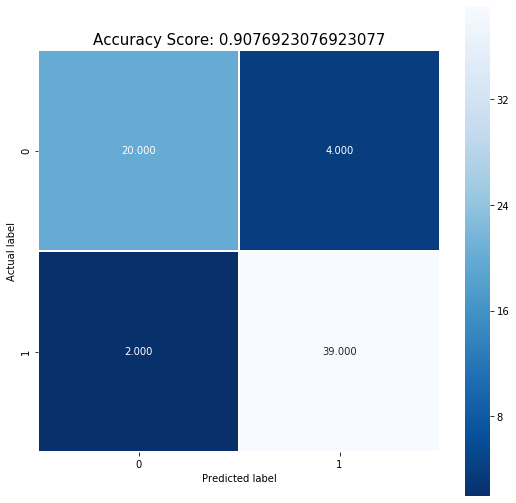

In [15]:
#Confusion matrix
cm = metrics.confusion_matrix(Y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

**TO DO** [Answer the following] Which features did you select and why ? Compare the perfromances with the ones of the case with all the 3 features and comment about the results. [Write the answer in this cell]

Using feature **height** and **weight** I obtaing and accuracy of $92,3 \%$. 

Using feature **height** and **age** I obtaing and accuracy of $72,3 \%$. 
Using feature **weight** and **age** I obtaing and accuracy of $92,3 \%$.

It was independent to use feature **height$-$weight** or **weight$-$age** both of them brings the same (and good) accuracy as well as the same confusion matrix


If everything is ok, the code below uses the model in $logreg$ to plot the decision region for the two features chosen above, with colors denoting the predicted value. It also plots the points (with correct labels) in the training set. It makes a similar plot for the test set.

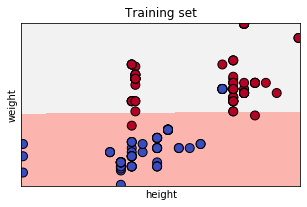

In [16]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

# NOTICE: This visualization code has been developed for a "standard" solution of the notebook, 
# it could be necessary to make some fixes to adapt to your implementation

h = .02  # step size in the mesh
x_min, x_max = X_reduced[:, 0].min() - .5, X_reduced[:, 0].max() + .5
y_min, y_max = X_reduced[:, 1].min() - .5, X_reduced[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(5, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)


# Plot also the training points
plt.scatter(X_training[:, 0], X_training[:, 1], c=Y_training, s = 80, edgecolors='black', linewidth=1, cmap=plt.cm.coolwarm)
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

# specify the boundaries of the figure
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# specify the ticks on the X and Y axes
plt.xticks(())
plt.yticks(())
plt.title('Training set')

plt.show()


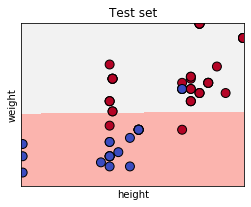

In [17]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)


# Plot also the test points 
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, s = 80, edgecolors='black', linewidth=1, cmap=plt.cm.coolwarm)
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Test set')

plt.show()
